# Implied volatility of European options

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [4,3]
mpl.rcParams['lines.linewidth'] = 2

import sys
sys.path.append('..')
import pyQuafi.models.options as options

## Introduction

The implied volatility $\sigma$ (IV) is the value of underlying's volatility for which the market price of an option is equal to that obtained using Black-Scholes pricing. IV is a measure of how the markets expect the underlying's value to change in the near future. The tendency of options prices to be higher when the underlying's value is more volatile is captured by IV.  

Since it is not feasible to invert Black-Scholes formula to obtain implied volatility directly, we will use the iterative Newton-Raphson root finding method to calculate it.

In [ ]:
def impliedVolatility(S0, K, T, t, r, price_market, tol=1e-5):
    sigma_guess = 0.2 # initial guess for Newton-Raphson method
    max_iter = 500

    i=0
    converge = False
    while not converge:

        # Black-Scholes estimates
        bs = options.BlackScholes(S0, K, T, t, r, sigma_guess)
        price_bs = bs.call()
        vega = bs.vega()

        # Difference between BS and market price
        price_diff = price_bs - price_market

        # Newton-Raphson and new BS
        sigma_new = sigma_guess - price_diff/vega
        bs_new = options.BlackScholes(S0, K, T, t, r, sigma_guess)
        price_bs_new = bs_new.call()

        # Check convergence
        if np.abs(price_bs_new - price_bs)<tol:
            converge = True
            
        # Maximum iterations
        if i > max_iter:
            print(f"Method did not converge with max_iter={max_iter}")
            break

        sigma_guess = sigma_new
        i += 1

    sigma_implied = sigma_new
    return sigma_implied

## Variation of IV with strike price

Text(0, 0.5, 'Implied volatility $\\sigma$')

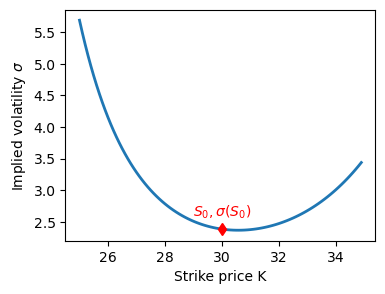

In [50]:
S0 = 30
T = 0.5
t = 0
r = 0.05
Ks = np.arange(25,35,0.1)

price_market = 20.0
sigmas_implied = np.zeros(len(Ks))
for i, K in enumerate(Ks):
    sigmas_implied[i] = impliedVolatility(S0, K, T, t, r, price_market)

plt.plot(Ks,sigmas_implied)
plt.plot(S0,impliedVolatility(S0, S0, T, t, r, price_market),'rd')
plt.text(S0,impliedVolatility(S0, S0, T, t, r, price_market)+0.2,r'$S_0,\sigma(S_0)$',c='r',ha='center')
plt.xlabel('Strike price K')
plt.ylabel(r'Implied volatility $\sigma$')

The above curve it often referred to as the _volatility smile_. This indicates that for a given maturity, options that are highly in the money or out of the money implies a larger volatility in the price of the underlying asset.